In [1]:
! pip install yfinance pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 922.4 kB/s eta 0:00:0031m? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 2.3 MB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 5.2 MB/s eta 0:00:006.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━

# Analyze Stock Monthly Return

## Util functions

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

[*********************100%%**********************]  1 of 1 completed

    Year  Performance (%)
0   2014              4.3
1   2015             -0.7
2   2016             11.2
3   2017             18.4
4   2018             -7.0
5   2019             28.7
6   2020             15.3
7   2021             28.8
8   2022            -20.0
9   2023             24.7
10  2024             15.4


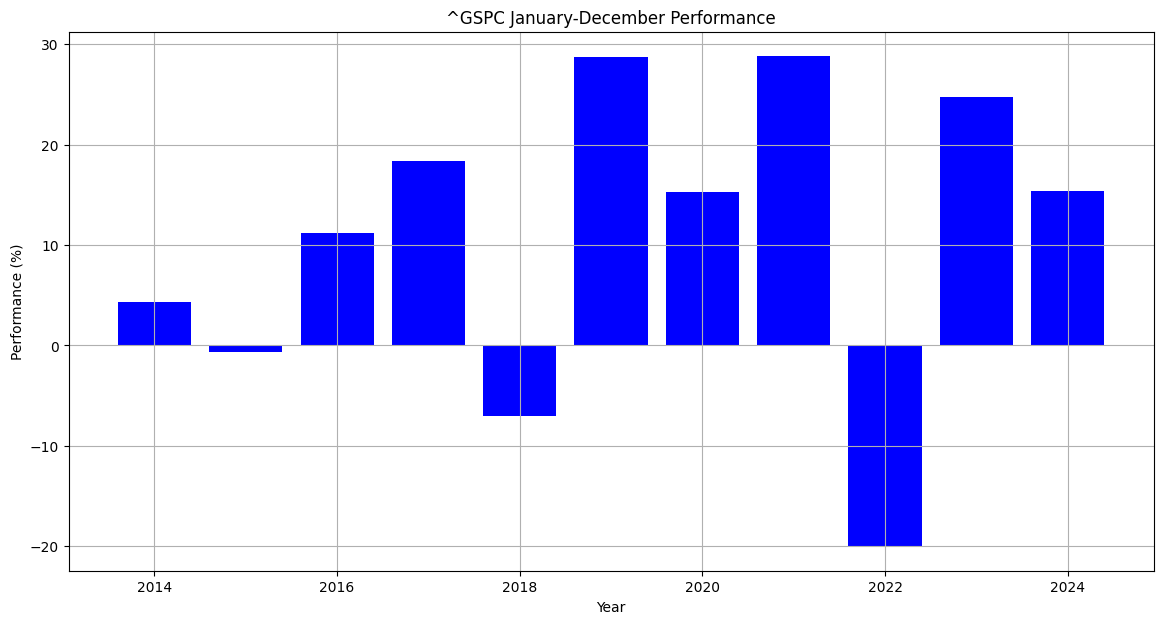

[*********************100%%**********************]  1 of 1 completed


    Year  Performance (%)
0   2014            -30.0
1   2015             37.0
2   2016            121.9
3   2017           1318.0
4   2018            -72.6
5   2019             87.2
6   2020            302.8
7   2021             57.6
8   2022            -65.3
9   2023            154.2
10  2024             42.3


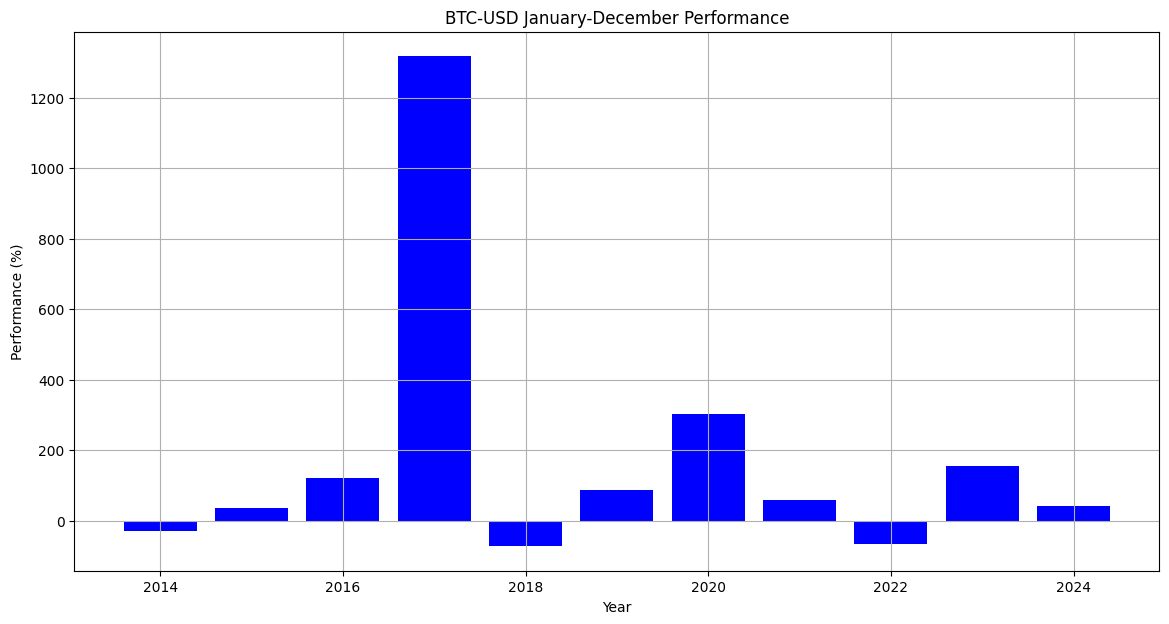

In [50]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)

def filter_month_data(data, months):
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    if len(months) == 1:
        return data[data['Month'] == months[0]]
    else:
        start_month, end_month = months
        if start_month <= end_month:
            return data[(data['Month'] >= start_month) & (data['Month'] <= end_month)]
        else:
            return data[(data['Month'] >= start_month) | (data['Month'] <= end_month)]

def calculate_period_performance(data, period, election_years_only=False):
    if election_years_only:
        data = data[data['Year'] % 4 == 0]

    performance = []
    years = data['Year'].unique()
    for year in years:
        period_data = data[data['Year'] == year]
        
        if period == "First Half":
            period_data = period_data[period_data.index.day <= 15]
        elif period == "Second Half":
            period_data = period_data[period_data.index.day > 15]
        
        if not period_data.empty:
            start_price = period_data['Close'].iloc[0]
            end_price = period_data['Close'].iloc[-1]
            change = (end_price - start_price) / start_price * 100
            performance.append({"Year": year, "Performance (%)": round(change, 1)})

    return pd.DataFrame(performance)

def plot_performance(performance_df, months, period, election_years_only, ticker):
    plt.figure(figsize=(14, 7))
    plt.bar(performance_df['Year'], performance_df['Performance (%)'], color='blue')
    plt.xlabel('Year')
    plt.ylabel('Performance (%)')
    if len(months) == 1:
        title = f'{ticker} {datetime(1, months[0], 1).strftime("%B")} {period} Performance'
    else:
        start_month, end_month = months
        title = f'{ticker} {datetime(1, start_month, 1).strftime("%B")}-{datetime(1, end_month, 1).strftime("%B")} Performance'
    if election_years_only:
        title += ' in Election Years'
    plt.title(title)
    plt.grid(True)
    plt.show()

def analyze_ticker_performance(ticker, months, num_years, election_years_only):
    # Define the time period for the specified number of years
    end_date = datetime.today()
    start_date = (end_date - timedelta(days=num_years * 365)).replace(day=1)
    end_date = end_date.strftime('%Y-%m-%d')
    start_date = start_date.strftime('%Y-%m-%d')

    # Fetch the historical data
    data = fetch_data(ticker, start_date, end_date)

    # Filter the data for the selected months
    month_data = filter_month_data(data, months)

    if len(months) == 1:
        # Calculate the performance for the entire month, first half, and second half
        performance_entire_month = calculate_period_performance(month_data, "Entire Month", election_years_only)
        performance_first_half = calculate_period_performance(month_data, "First Half", election_years_only)
        performance_second_half = calculate_period_performance(month_data, "Second Half", election_years_only)

        # Plot the performance
        plot_performance(performance_entire_month, months, "Entire Month", election_years_only, ticker)
        plot_performance(performance_first_half, months, "First Half", election_years_only, ticker)
        plot_performance(performance_second_half, months, "Second Half", election_years_only, ticker)
    else:
        # Calculate the performance for the specified period
        performance_df = calculate_period_performance(month_data, "Entire Month", election_years_only)

        # Display the performance DataFrame
        print(performance_df)

        # Plot the performance
        plot_performance(performance_df, months, "Entire Month", election_years_only, ticker)

## Params 

[*********************100%%**********************]  1 of 1 completed

   Year  Performance (%)
0  2015              0.2
1  2016              4.3
2  2017              7.3
3  2018              0.8
4  2019             17.2
5  2020             -4.8
6  2021             16.1
7  2022            -21.1
8  2023             16.4
9  2024             15.1


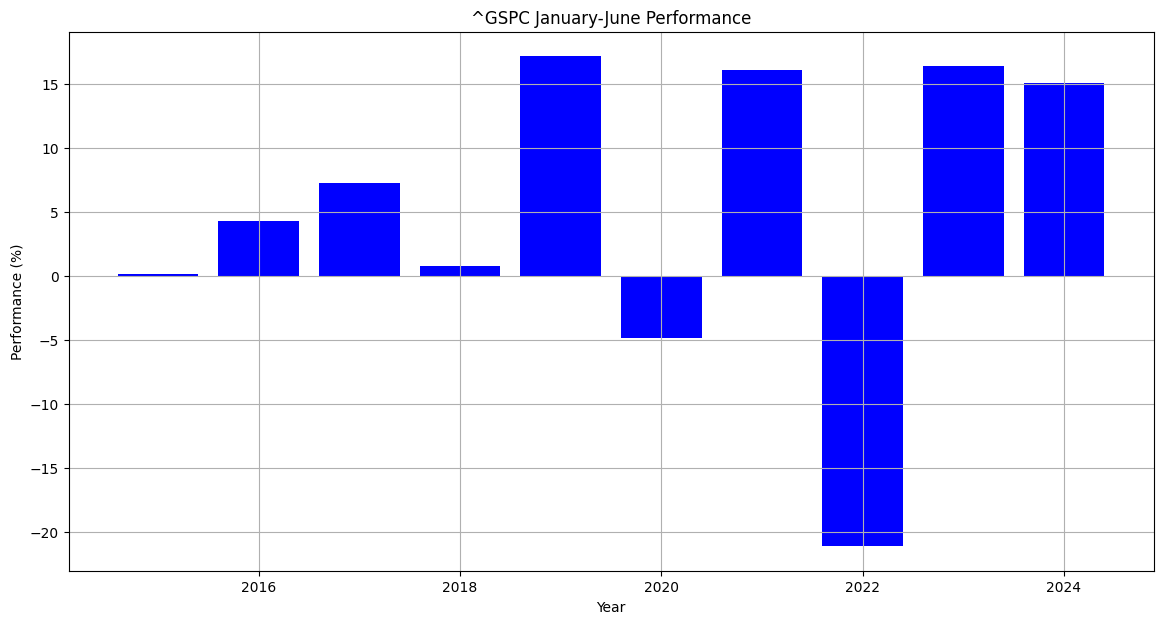

In [48]:
# Parameters
tickers = ["^GSPC", "BTC-USD"]  # List of ticker symbols for S&P 500 and Bitcoin
months = [1, 12]  # Range of months to analyze (e.g., [1, 12] for January to December)
num_years = 10  # Number of years for analysis
election_years_only = False  # Whether to filter for election years only

# Analyze performance for each ticker
for ticker in tickers:
    analyze_ticker_performance(ticker, months, num_years, election_years_only)

### QQQ

[*********************100%%**********************]  1 of 1 completed

   Year  Performance (%)
0  2015              0.2
1  2016              4.3
2  2017              7.3
3  2018              0.8
4  2019             17.2
5  2020             -4.8
6  2021             16.1
7  2022            -21.1
8  2023             16.4
9  2024             15.1


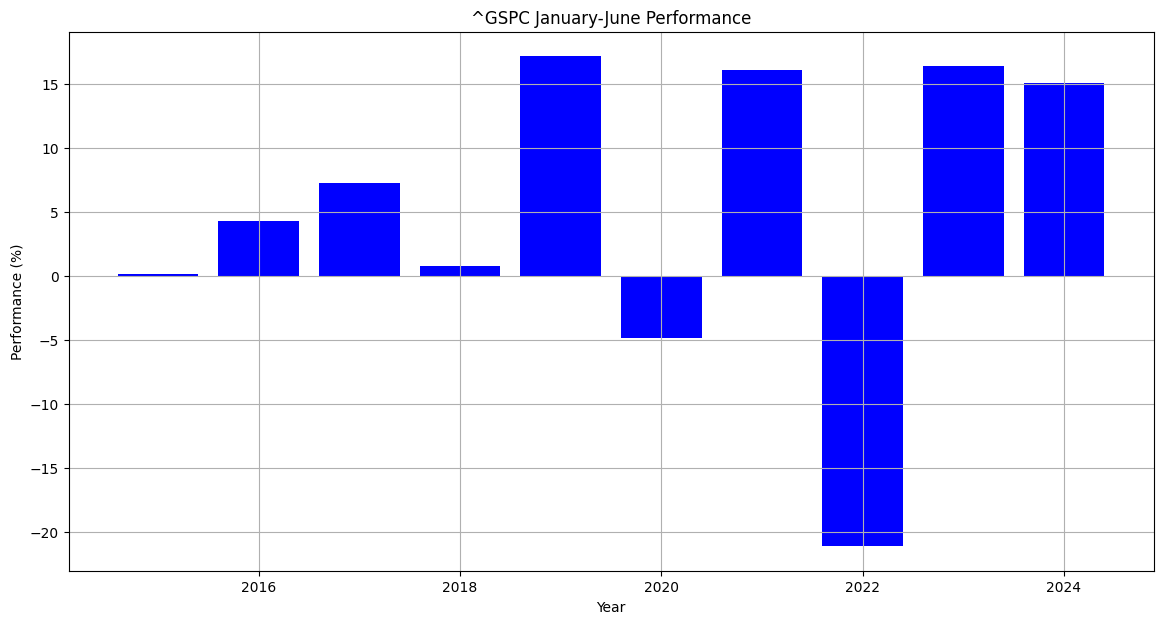

In [49]:
# Parameters
ticker = "^GSPC"  # Ticker symbol for S&P 500
months = [1,6]  # List of months to analyze (e.g., [7] for July, [1, 12] for January to December)
num_years = 10  # Number of years for analysis
election_years_only = False  # Whether to filter for election years only

# Define the time period for the specified number of years
end_date = datetime.today()
start_date = (end_date - timedelta(days=num_years * 365)).replace(day=1)
end_date = end_date.strftime('%Y-%m-%d')
start_date = start_date.strftime('%Y-%m-%d')

# Fetch the historical data
data = fetch_data(ticker, start_date, end_date)

# Filter the data for the selected months
month_data = filter_month_data(data, months)

if len(months) == 1:
    # Calculate the performance for the entire month, first half, and second half
    performance_entire_month = calculate_period_performance(month_data, "Entire Month", election_years_only)
    performance_first_half = calculate_period_performance(month_data, "First Half", election_years_only)
    performance_second_half = calculate_period_performance(month_data, "Second Half", election_years_only)

    # Plot the performance
    plot_performance(performance_entire_month, months, "Entire Month", election_years_only, ticker)
    plot_performance(performance_first_half, months, "First Half", election_years_only, ticker)
    plot_performance(performance_second_half, months, "Second Half", election_years_only, ticker)
else:
    # Calculate the performance for the specified period
    performance_df = calculate_period_performance(month_data, "Entire Month", election_years_only)

    # Display the performance DataFrame
    print(performance_df)

    # Plot the performance
    plot_performance(performance_df, months, "Entire Month", election_years_only, ticker)